# Domain wall - skyrmion conversion

In [1]:
import hublib.use
%use oommf-1.2b0

import oommfc as oc
import discretisedfield as df
%matplotlib inline

In [2]:
# We need this because this example is running in a read-only directory.
# You should not normally do this.
import os
try:
    os.mkdir('/tmp/oommf')
except:
    pass
os.chdir('/tmp/oommf')

In [3]:
A = 15e-12
alpha = 0.3
Ms = 5.8e5
D = 3e-3
K1 = 0.5e6
u = (0, 0, 1)

In [4]:
system = oc.System(name="conversion")

In [5]:
system.hamiltonian = oc.Exchange(A=A) + oc.DMI(D=D, crystalclass="Cnv") + oc.UniaxialAnisotropy(K1=K1, u=u)

In [6]:
system.dynamics = oc.Precession(gamma=2.211e5) + oc.Damping(alpha=alpha)

In [7]:
p1 = (0, 0, 0)
p2 = (150e-9, 50e-9, 2e-9)
cell = (2e-9, 2e-9, 2e-9)
mesh = oc.Mesh(p1=p1, p2=p2, cell=cell)

In [8]:
def Ms_fun(pos):
    x, y, z = pos
    if x < 50e-9 and (y < 15e-9 or y > 35e-9):
        return 0
    else:
        return Ms
    
def m_init(pos):
    x, y, z = pos
    if 30e-9 < x < 40e-9:
        return (0.1, 0.1, -1)
    else:
        return (0.1, 0.1, 1)

In [9]:
system.m = df.Field(mesh, value=m_init, norm=Ms_fun)

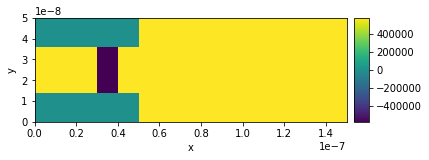

In [10]:
system.m.z.plot_plane(z=0);

In [11]:
md = oc.MinDriver()
md.drive(system)

2018/5/25 0:4: Calling OOMMF (conversion/conversion.mif) ... [2.6s]
Error when executing:
	command: tclsh /apps/share64/debian7/oommf/oommf-1.2b0/oommf.tcl boxsi +fg conversion/conversion.mif -exitondone 1
	stdout: Boxsi run end.

	stderr: <4281> boxsi  Oc_Config warning:
Tcl version mismatch:
	/apps/share64/debian7/anaconda/anaconda3-dev/lib/tclConfig.sh from 8.6.7
	Running Tcl 8.5.11
<4281> boxsi  Oc_Config warning:
Tk version mismatch:
	/apps/share64/debian7/anaconda/anaconda3-dev/lib/tkConfig.sh from 8.6
	Running Tk 8.5
<4276> oommf.tcl 1.2.1.0  panic:
child process exited abnormally





RuntimeError: Some problem calling OOMMF.

In [ ]:
system.m.z.plot_plane(z=0);

In [ ]:
ux = 402.35  # velocity in x direction
beta = 0.5  # non-adiabatic STT parameter

system.dynamics += oc.STT(u=(ux, 0, 0), beta=beta)

In [ ]:
td = oc.TimeDriver()
td.drive(system, t=0.2e-9, n=200)

In [ ]:
system.m.z.plot_plane(z=0);

<hr>
Cleaning up.  Temporary files were written.  You may want to remove them.

In [ ]:
!rm -rf conversion